In [94]:
import numpy as np 
import os
from multiprocessing import Pool
from glob import glob
from tqdm import tqdm
import h5py
import SimpleITK as sitk
from PIL import Image
from tqdm import tqdm

def save_h5(data, save_path, save_name):
    with h5py.File(os.path.join(save_path, save_name), 'w') as f:
        f.create_dataset('main', data=data,dtype=np.uint8)

def read_img(path, size = 1024):
    img = Image.open(path)
    data = np.array(img)
    x,y = data.shape
    # 从中点取子图
    x = x // 2
    y = y // 2
    img = []
    for i in range(-2, 2):
        for j in range(-2 ,2):
            img.append(data[x + i * size : x + i * size + size, y + j * size : y + j * size + size])
    return img, len(img)

In [2]:
first_path = '/braindat/large-scale-EM-data/FAFB'
second_path = sorted(glob(first_path + '/*'))

In [7]:
second_path = []
for i in os.listdir(first_path):
    if 'tar' not in i and 'order' not in i and 'ent' not in i:
        second_path.append(os.path.join(first_path, i))
second_path = sorted(second_path)

In [73]:
# 判断list数值是否连续
def is_continuity(list):
    for i in range(len(list) - 1):
        if int(list[i]) + 1 != int(list[i + 1]):
            return False
    return True


In [74]:
for i in second_path:
    third_path = sorted(glob(i + '/*'))
    data = [j.split('/')[-1] for j in third_path]
    if not is_continuity(data):
        print(i)

/braindat/large-scale-EM-data/FAFB/temca2_1_700.13.0
/braindat/large-scale-EM-data/FAFB/temca2_2101_2800.13.0
/braindat/large-scale-EM-data/FAFB/temca2_2801_3500.13.0
/braindat/large-scale-EM-data/FAFB/temca2_3501_4200.13.0
/braindat/large-scale-EM-data/FAFB/temca2_4201_4900.13.0
/braindat/large-scale-EM-data/FAFB/temca2_4901_5600.13.0
/braindat/large-scale-EM-data/FAFB/temca2_5601_6300.13.0
/braindat/large-scale-EM-data/FAFB/temca2_6301_7062.13.0
/braindat/large-scale-EM-data/FAFB/temca2_701_1400.13.0


In [76]:
data_used = ['/braindat/large-scale-EM-data/FAFB/temca2_2801_3500.13.0','/braindat/large-scale-EM-data/FAFB/temca2_3501_4200.13.0']

In [80]:
center_path2 = '/braindat/large-scale-EM-data/FAFB/temca2_2801_3500.13.0/3499/3499.0.7.19.png'
img2 = Image.open(center_path2)
data2 = np.array(img2)

In [90]:
father_path = '/braindat/large-scale-EM-data/FAFB/temca2_2801_3500.13.0'
data_path = []
for i in range(3000,3501):
    data_path.append(os.path.join(father_path, str(i),str(i)+'.0.7.19.png'))
print(len(data_path))

501


In [84]:
for i in data_path:
    try:
        img = Image.open(i)
    except:
        print(i)

/braindat/large-scale-EM-data/FAFB/temca2_2801_3500.13.0/3033/3033.0.7.19.png


In [101]:
father_path2 = '/braindat/large-scale-EM-data/FAFB/temca2_3501_4200.13.0'
data_path2 = []
for i in range(3501,4001):
    data_path2.append(os.path.join(father_path2, str(i),str(i)+'.0.7.19.png'))
print(len(data_path2))

500


In [100]:
from tqdm import tqdm
for i in tqdm(data_path2):
    try:
        img = Image.open(i)
    except:
        print(i)

100%|██████████| 500/500 [00:00<00:00, 661.18it/s]


In [11]:
from h5py import File
import numpy as np
from matplotlib import pyplot as plt
import os

In [57]:
fib_path = '/braindat/lab/chenyd/DATASET/miccai_pretrain_data/Mito_human/Mito_human_990_14.hdf'
with File(fib_path, 'r') as f:
    data = f['main'][:]
print(data.shape)

(100, 1024, 1024)


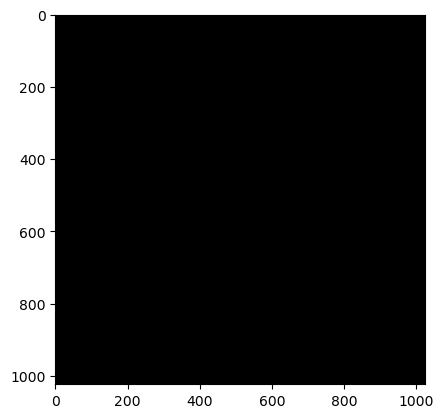

In [58]:
plt.imshow(data[99],cmap='gray')

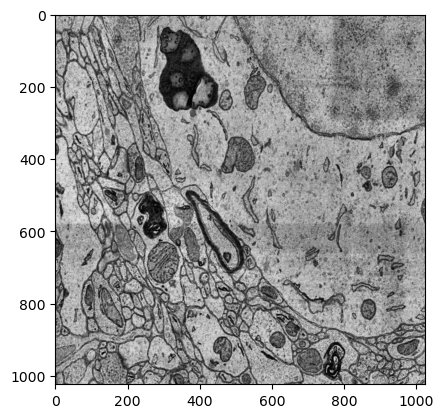

In [59]:
plt.imshow(data[98],cmap='gray')

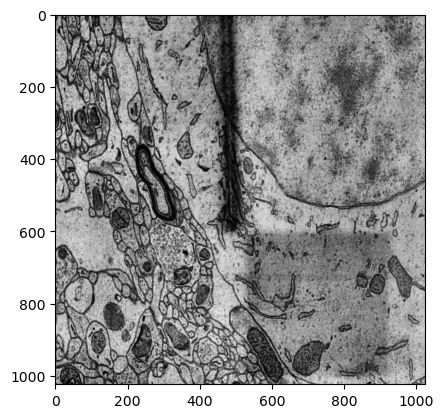

In [61]:
plt.imshow(data[30],cmap='gray')

In [53]:
data[99] == data[98]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [103]:
FAFB_list = data_path + data_path2
print(len(FAFB_list))

1001


In [104]:
save_path = '/braindat/lab/chenyd/DATASET/miccai_pretrain_data'
save_name = 'FAFBEM_07_19'
K_list_middle = FAFB_list
save_path = os.path.join(save_path, save_name)
if not os.path.exists(save_path):
    os.makedirs(save_path)

k = 0
temp_hdf = [np.zeros((100, 1024, 1024)) for _ in range(16)]

for i in tqdm(range(len(K_list_middle))):
    img, num = read_img(K_list_middle[i])
    for j in range(num):
        #print(img[j].shape)
        temp_hdf[j][i % 100] = img[j]
        if i % 100 == 99:
            for l in range(16):
                save_h5(temp_hdf[l], save_path, save_name + '_' + str(i) + '_' + str(l) + '.hdf')

100%|██████████| 1001/1001 [53:00<00:00,  3.18s/it]  
